# Forecasting Final Memo
By Malcolm Skinner
11-12-2023

## Importance Of Forecasting
Forecasting is important for planning. There are times when our decisions will depend on a future event. From the weather to interest rates, knowledge of what the future holds is valuable. In rain, we will stay indoors or change our outfit. In a high interest rate environment, we may be more inclined to save and find a job than to rely on investment income, since the value of saving money is greater.

## Importance Of Political Forecasting
### General
Being able to predict accurately who will hold power in the future is valuable for many reasons; your property values or job might significantly change based on who wins the election. Political forecasting also provides insights into potential policy changes, economic strategies, and social reforms that could shape the business environment and societal norms. For businesses, understanding political trends helps in strategic planning and risk management. For individuals, it influences decisions like investment, career choices, and even personal values alignment.

### Implications on Policy and Economy
Political forecasting can shed light on future government policies, which in turn affects various sectors like healthcare, education, energy, and defense. Anticipating these changes allows businesses and individuals to prepare for shifts in regulation, taxation, and government spending. In the economy, changes in leadership can lead to shifts in fiscal policy, international trade agreements, and market regulations, all of which have far-reaching effects on global and local economies.

### Social Impact
On a social level, political forecasting can indicate shifts in societal priorities and values. This might involve changes in social welfare programs, human rights policies, and environmental regulations. Understanding these potential changes can help organizations and individuals align their strategies and actions with future societal expectations and norms.

## Methods

### Min-Max Scaling
Conducted Min-Max scaling to normalize the data, ensuring that each feature contributes approximately proportionately to the final prediction. This technique is crucial when variables are measured in different scales and ranges, as it prevents features with larger ranges from dominating the model's predictions. Min-Max scaling transforms the data into a fixed range between 0 and 1.

### Selecting Economic Data
In considering the economic variables that most influence voter behavior, I focused on inflation. Inflation is a key economic factor that the average person perceives and feels the impact of in their daily life. This choice was inspired by Healy and Malhotra's (2009) exploration of myopic voter behavior in disaster responses, where they observed a preference for aid spending over preventative measures. In an attempt to address potential myopia in economic results, I tested various timespans but encountered counterintuitive results. It is possible that myopic behavior is not as prominent in the relationship between a party's continued reign and economic factors, as voters might pay more attention to the overall economic conditions. Fair (1982) underscored the importance of Gross National Product (GNP) in political forecasting.  I opted for consumer sentiment since it is not typically used in forecasting, and I am interested to see if it yields better results.

### Selecting Silly Variable
The hypothesis that a candidate's height influences electability, albeit superficially, led me to include the incumbent or same-party member's height as a variable. This choice was based on anecdotal evidence suggesting that taller candidates may have an electoral advantage. Ideally, a more accurate metric would have been the height difference between the incumbent party's candidate and their rival, as this could more directly capture any potential height advantage. However, consistent and reliable data on such height differences was challenging to source, limiting the scope of this analysis to the height of the incumbent or same-party member.


## Analysis and Results

In [146]:
pip install scikit-learn pandas-datareader fredapi statsmodels seaborn

                                              0.0/294.6 kB ? eta -:--:--
     ------------------                     143.4/294.6 kB 4.3 MB/s eta 0:00:01
     ------------------------------------   286.7/294.6 kB 4.5 MB/s eta 0:00:01
     -------------------------------------- 294.6/294.6 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [147]:
import pandas as pd
from io import StringIO
from fredapi import Fred

# Function to get the average consumer sentiment
def get_average_consumer_sentiment_fred(api_key, years):
    fred = Fred(api_key=api_key)
    sentiment_data = {}

    try:
        full_sentiment_series = fred.get_series('UMCSENT')
    except:
        return "Error fetching data from FRED"

    for year in years:
        start_year = year - 3
        end_year = year
        sentiment_sum = 0
        valid_years = 0

        for y in range(start_year, end_year + 1):
            year_sentiment = full_sentiment_series[str(y)]
            if not year_sentiment.empty:
                sentiment_sum += year_sentiment.mean()
                valid_years += 1

        sentiment_data[year + 1] = sentiment_sum / valid_years if valid_years > 0 else None

    sentiment_df = pd.DataFrame(list(sentiment_data.items()), columns=["Year", "Average Consumer Sentiment"])
    return sentiment_df

# Function to merge the consumer sentiment data with your dataset
def merge_with_sentiment(sentiment_df, raw_data):
    data_df = pd.read_csv(StringIO(raw_data), sep="\t")
    merged_df = pd.merge(data_df, sentiment_df, on="Year", how="left")
    return merged_df

# Raw data string
raw_data = """
Year\tIncumbent Percentage of Two Party Vote\tPresidential Approval (JUNE OF ELECTION YEAR)\tHeight\tEconomic Data
1960\t49.899\t60.00\t179\t
1964\t61.345\t74.00\t192\t
1968\t49.593\t49.00\t192\t
1972\t61.813\t59.00\t182\t
1976\t48.980\t45.00\t183\t
1980\t44.858\t32.00\t177\t
1984\t59.155\t54.00\t185\t
1988\t53.885\t63.00\t185\t
1992\t46.517\t37.00\t188\t
1996\t54.727\t55.00\t189\t
2000\t50.260\t66.00\t189\t
2004\t51.212\t49.00\t182\t
2008\t46.349\t34.00\t182\t
2012\t51.984\t46.00\t187\t
2016\t51.116\t59.00\t187\t
2020\t47.760\t34.00\t191\t
"""

years = [year - 1 for year in range(1960, 2021, 4)]
sentiment_df = get_average_consumer_sentiment_fred('848b2cef995d2ea837e300c8c4fe4bba', years)

merged_df = merge_with_sentiment(sentiment_df, raw_data)

# Displaying the first few rows of the merged dataframe
print(merged_df.head())


   Year  Incumbent Percentage of Two Party Vote  \
0  1960                                  49.899   
1  1964                                  61.345   
2  1968                                  49.593   
3  1972                                  61.813   
4  1976                                  48.980   

   Presidential Approval (JUNE OF ELECTION YEAR)  Height  Economic Data  \
0                                           60.0     179            NaN   
1                                           74.0     192            NaN   
2                                           49.0     192            NaN   
3                                           59.0     182            NaN   
4                                           45.0     183            NaN   

   Average Consumer Sentiment  
0                   91.420833  
1                   94.981250  
2                   97.956250  
3                   84.712500  
4                   75.887500  


In [152]:
# apply min-max scaling:
from sklearn.preprocessing import MinMaxScaler

# Dropping the 'Year' column
merged_df_drop_year = merged_df.drop('Year', axis=1)
merged_df_drop_year = merged_df_drop_year.drop('Economic Data', axis=1)

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Performing min-max scaling
scaled_data = scaler.fit_transform(merged_df_drop_year)

# Converting the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=merged_df_drop_year.columns)

scaled_df.head()  # Displaying the first few rows of the scaled dataframe


,Incumbent Percentage of Two Party Vote,Presidential Approval (JUNE OF ELECTION YEAR),Height,Average Consumer Sentiment
0,0.297316,0.666667,0.133333,0.698817
1,0.972398,1.000000,1.000000,0.801968
2,0.279269,0.404762,1.000000,0.888158
3,1.000000,0.642857,0.333333,0.504466
4,0.243114,0.309524,0.400000,0.248793


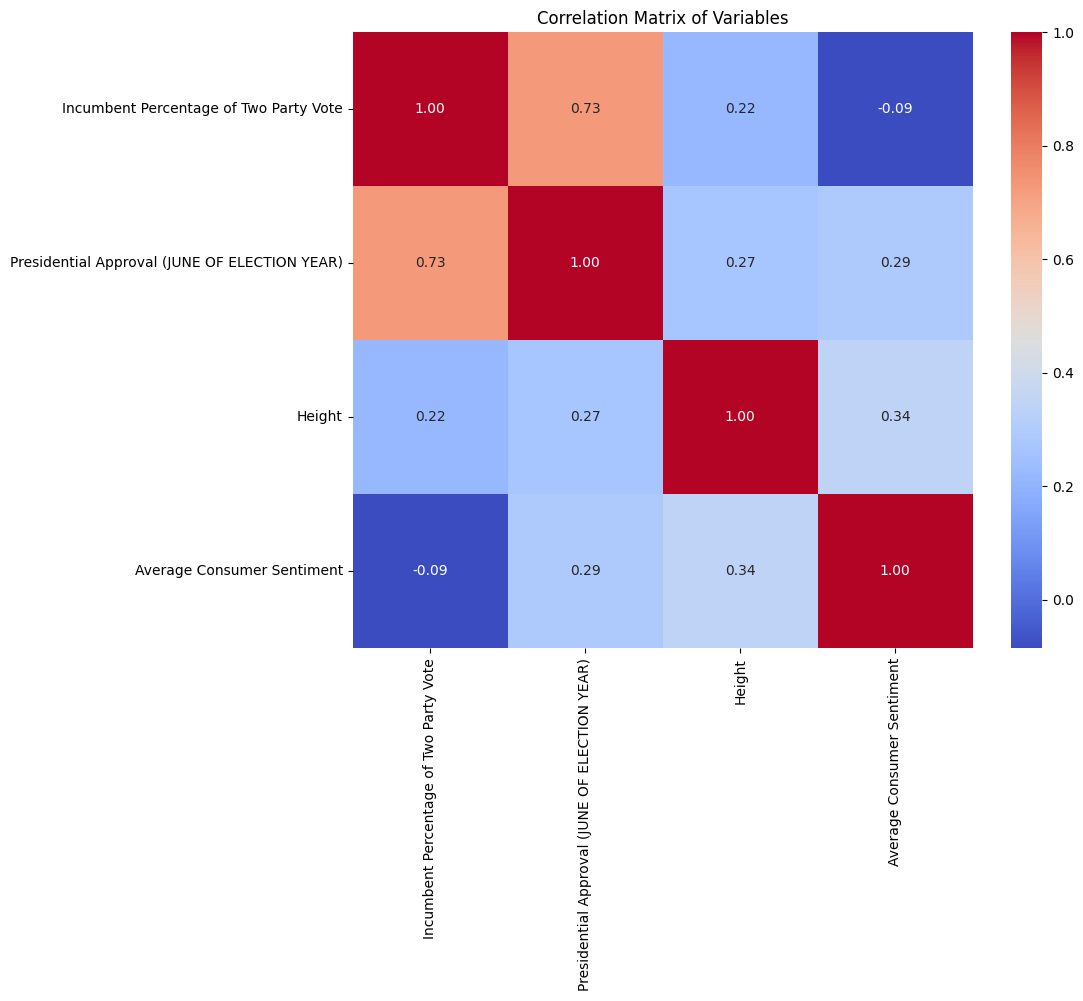

In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr_matrix = scaled_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()



In [149]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'scaled_df' is your scaled DataFrame
# Independent Variables (excluding the target variable)
X = scaled_df.drop('Incumbent Percentage of Two Party Vote', axis=1)
y = scaled_df['Incumbent Percentage of Two Party Vote']

# Add a constant to the model (intercept)
X_const = sm.add_constant(X)

# Create and fit the model
model = sm.OLS(y, X_const).fit()

# Summary of the model
model_summary = model.summary()
print(model_summary)

# Creating the linear regression model using scikit-learn for comparison
reg = LinearRegression()
reg.fit(X, y)

# Making predictions
y_pred = reg.predict(X)

# Calculating R^2 and Adjusted R^2
r2 = r2_score(y, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

# Calculating Mean Squared Error
mse = mean_squared_error(y, y_pred)

# Coefficients and Intercept
coefficients = reg.coef_
intercept = reg.intercept_

# Preparing the statistics for display
statistics = {
    "Coefficients": coefficients,
    "Intercept": intercept,
    "R^2": r2,
    "Adjusted R^2": adjusted_r2,
    "Mean Squared Error": mse
}

print(statistics)


                                      OLS Regression Results                                      
Dep. Variable:     Incumbent Percentage of Two Party Vote   R-squared:                       0.636
Model:                                                OLS   Adj. R-squared:                  0.546
Method:                                     Least Squares   F-statistic:                     7.002
Date:                                    Sun, 12 Nov 2023   Prob (F-statistic):            0.00562
Time:                                            19:21:20   Log-Likelihood:                 4.9260
No. Observations:                                      16   AIC:                            -1.852
Df Residuals:                                          12   BIC:                             1.238
Df Model:                                               3                                         
Covariance Type:                                nonrobust                                         
          

c:\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


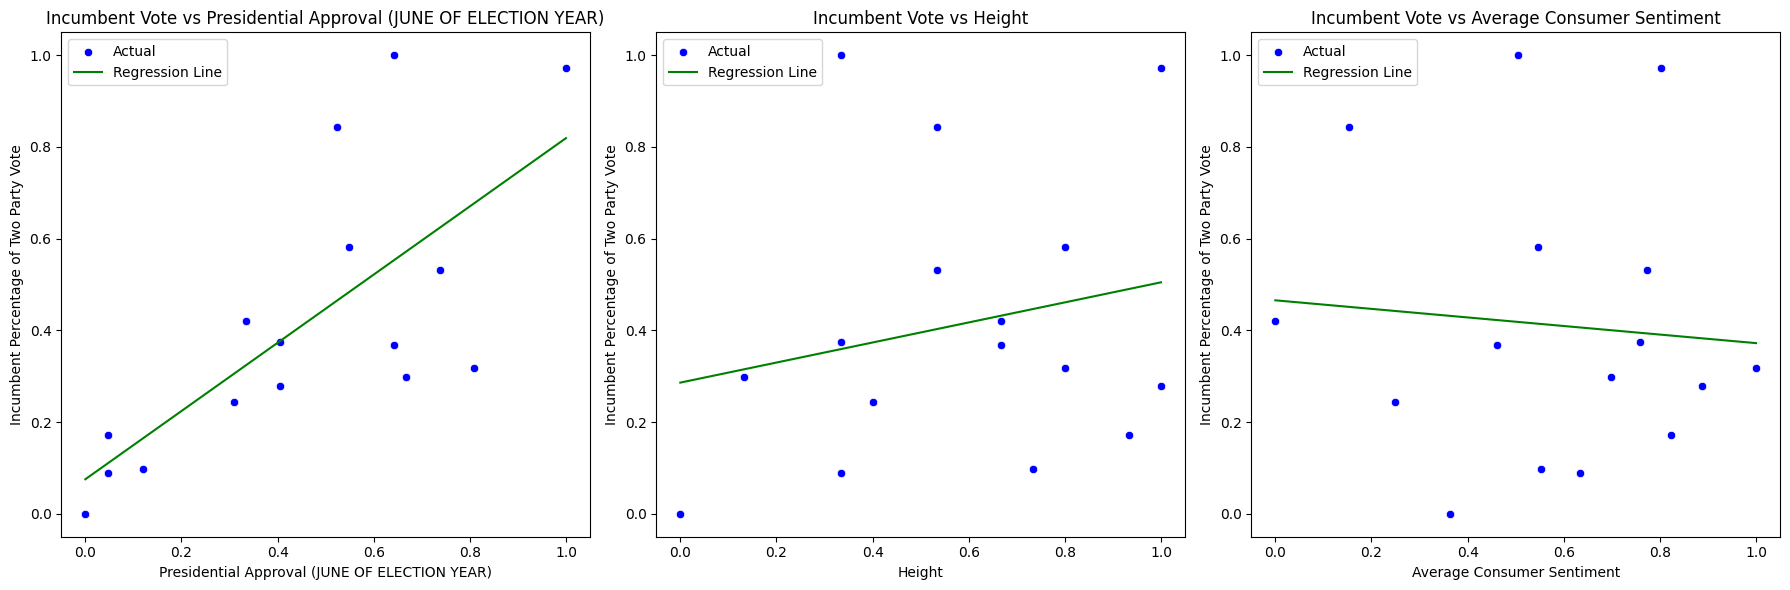

In [150]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Independent Variables (excluding the target variable)
X = scaled_df.drop('Incumbent Percentage of Two Party Vote', axis=1)
y = scaled_df['Incumbent Percentage of Two Party Vote']

# Create and fit the linear regression model
reg = LinearRegression()
reg.fit(X, y)

# Making predictions for each variable separately to plot the regression line
for var in X.columns:
    x_var = X[[var]]
    reg_var = LinearRegression()
    reg_var.fit(x_var, y)
    scaled_df[f'{var}_pred'] = reg_var.predict(x_var)

# Plotting scatter plots with regression lines
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
for i, var in enumerate(X.columns):
    sns.scatterplot(x=scaled_df[var], y=y, ax=axs[i], label='Actual', color='blue')
    sns.lineplot(x=scaled_df[var], y=scaled_df[f'{var}_pred'], ax=axs[i], label='Regression Line', color='green')
    axs[i].set_title(f'Incumbent Vote vs {var}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Incumbent Percentage of Two Party Vote')

plt.tight_layout()
plt.show()

## Discussion
The OLS regression results indicate how different variables affect the Incumbent Percentage of the Two-Party Vote. The model has an R-squared value of 0.636, suggesting that about 63.6% of the variability in the incumbent percentage of the two-party vote can be explained by the model. This is a relatively strong fit, as indicated by the Adjusted R-squared value of 0.546, which adjusts for the number of predictors in the model.

The F-statistic is 7.002 with a Prob (F-statistic) of 0.00562, indicating that the model is statistically significant at conventional significance levels. This means that there is only a 0.562% chance that these results could occur if the variables included had no effect.

Looking at individual predictors, the 'Presidential Approval (JUNE OF ELECTION YEAR)' has a positive coefficient of 0.8169 and is statistically significant (p-value < 0.001), suggesting a strong positive relationship between presidential approval and the incumbent's percentage of the vote. For every one-unit increase in presidential approval, the incumbent's vote percentage is expected to increase by approximately 0.817 units, holding all else constant.

The 'Height' variable has a coefficient of 0.1277, but it is not statistically significant (p-value = 0.515), indicating that this variable does not have a discernible impact on the incumbent's percentage of the vote within this model.

The 'Average Consumer Sentiment' has a negative coefficient of -0.3949. This suggests that higher consumer sentiment is associated with a decrease in the incumbent's vote percentage. However, the statistical significance of this variable is marginal (p-value = 0.082), suggesting caution in interpreting this result.

Overall, the model indicates that presidential approval is a significant predictor of the incumbent's vote percentage, while height does not appear to be a significant factor, and consumer sentiment shows a potential inverse relationship, though less definitively.

While not displayed in these final results, various economic metrics were tested in addition to consumer confidence, which all had negative coefficients, suggesting there are issues with my data.  I was unable to determine the source of these counterintuitive results.

## Conclusion

The analysis conducted in this study offers valuable insights into the factors influencing the incumbent percentage of the two-party vote. The model's relatively strong R-squared value of 0.636 and the statistically significant F-statistic underscore the relevance of the variables chosen. Presidential approval emerged as a significant predictor, affirming its importance in political forecasting.

However, the study faced limitations that warrant consideration. The non-significance of the 'Height' variable and the marginal significance of 'Average Consumer Sentiment' indicate that these variables might not be as influential in predicting electoral outcomes.

One significant challenge faced was the counterintuitive results obtained with various economic metrics, particularly those with negative coefficients. This issue points to potential limitations in the data or the model's inability to capture the nuanced relationship between economic factors and electoral outcomes. It also underscores the importance of qualitative factors, which are often challenging to quantify but play a crucial role in shaping political landscapes. Multicollinearity could have been a major problem with the approval rating and consumer confidence, since a relatively high value is shown in the correlation matrix.

The analysis could benefit from incorporating a broader range of variables, including non-numeric data types like public opinion on key issues, political alignment, or even sentiment analysis of media coverage. These qualitative factors, though difficult to quantify, could provide a more comprehensive understanding of the electoral dynamics.

## References

Gallup, Inc. "Presidential Job Approval Center." Gallup.com. Last modified 2020. https://news.gallup.com/poll/311825/presidential-job-approval-related-reelection-historically.aspx.

The American Presidency Project. "Presidential Job Approval Ratings." Presidency.ucsb.edu. Accessed 2023. https://www.presidency.ucsb.edu/statistics/data/final-presidential-job-approval-ratings.

Federal Reserve Economic Data (FRED), Federal Reserve Bank of St. Louis.

"Google Search." Accessed 2023. For presidential candidates' heights.

Fair, Ray C. "The Effect of Economic Events on Votes for President: 1980 Results." The Review of Economics and Statistics 64, no. 2 (1982): 322–25. https://doi.org/10.2307/1924312.

Healy, Andrew, and Neil Malhotra. "Myopic Voters and Natural Disaster Policy." American Political Science Review 103, no. 3 (2009): 387-406. https://doi.org/10.1017/S0003055409990104.